# <span style="color:navy"> Esercitazione 3 </span>

## <span style="color:teal"> Esercizio 3.1 </span>

In questo esercizio ho simulato il prezzo delle opzioni finanziarie secondo il modello di Black-Scholes sfruttando la tecnica della media a blocchi.



#### Cosa sono le opzioni?
Un'opzione europea è un contratto che conferisce al titolare il diritto (ma non l’obbligo) di comprare o vendere un'attività  a un prezzo fissato $K$ (strike price), a una certa data futura $T$ (scadenza):

- **Call option**: diritto di acquistare l’asset a prezzo $K$  
- **Put option**: diritto di vendere l’asset a prezzo $K$

Il modello di Black-Scholes assume che il prezzo dell’attività $S(t)$ sia dato da un moto browniano geometrico descritto da:

$$
S(t) = S(0) \cdot \exp\left[\left(r - \frac{\sigma^2}{2}\right)t + \sigma W_t\right]
$$


Il valore dell’opzione alla scadenza è dato dal payoff: 
- Call: $   e^{-rT} \cdot \max(S(T) - K, 0) $  
- Put: $   e^{-rT} \cdot \max(K - S(T), 0) $

dove:
- $r$: tasso di interesse privo di rischio  
- $\sigma$: volatilità (grado di variabilità del prezzo)  
- $W_t$: moto browniano standard ($N(0,t)$)  



#### Simulazione Monte Carlo

Per stimare il prezzo dell’opzione sono stati utilizzati i seguenti parametri:

- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

Come richiesto dalla consegna ho svolto la simulazione con due strategie di generazione del prezzo finale:

1. **Sampling diretto** Ho calcolato direttamente $S(T)$:

$$
S_T = S_0 \cdot \exp\left[\left(r - \frac{\sigma^2}{2}\right)T + \sigma z \sqrt{T}\right]
$$
con $z$ numero casuale tra 0 e 1

2. **Sampling discretizzato** Ho suddiviso l’intervallo temporale $[0, T]$ in $n$ passi e simulato l’evoluzione passo dopo passo:

$$
S_{t_{i+1}} = S_{t_i} \cdot \exp\left[\left(r - \frac{\sigma^2}{2}\right)\Delta t + \sigma z_i \sqrt{\Delta t}\right]
$$

dove ad ogni passo viene generato un nuovo z.

Per entrambi i metodi ho diviso le $10^5$ simulazioni in 100 blocchi da 1000 passi ciascuno. Per ogni blocco ho calcolato il valore medio del payoff.
Infine, mediando progressivamente i valori medi di blocco, ho ottenuto i risultati finali con i relativi errori.


Nei grafici sottostanti ho mostrato i valori ottenuti per la put e per la call in funzione del numero di blocchi per entrambe le strategie:

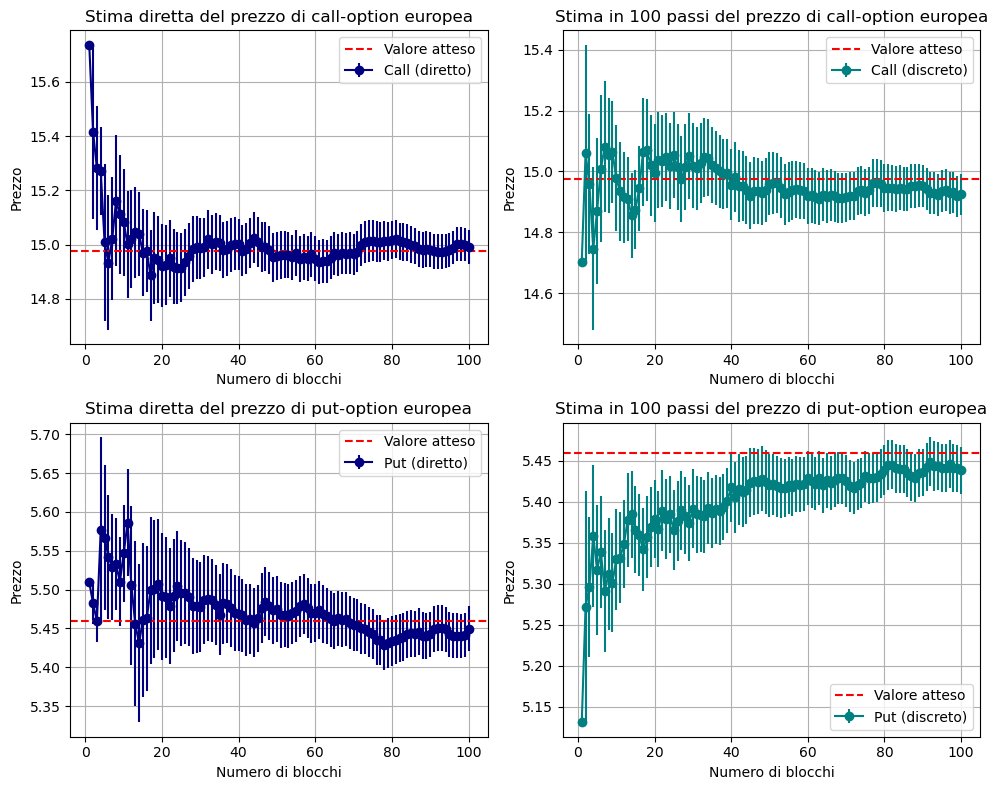

In [14]:
import numpy as np
import matplotlib.pyplot as plt



# Carico i dati
data_dir = np.loadtxt("Es1/Finanza.dat")
data_discr = np.loadtxt("Es1/Finanza_discreta.dat")

x = np.arange(1, data_dir.shape[0] + 1)
y_call_dir = data_dir[:, 0]
err_call_dir = data_dir[:, 1]
y_put_dir = data_dir[:, 2]
err_put_dir = data_dir[:, 3]

y_call_discr = data_discr[:, 0]
err_call_discr = data_discr[:, 1]
y_put_discr = data_discr[:, 2]
err_put_discr = data_discr[:, 3]

call_theory = 14.975790778311286
put_theory = 5.4595325819072364

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].errorbar(x, y_call_dir, yerr=err_call_dir, label="Call (diretto)", color='navy', marker='o', linestyle='-')
axes[0, 0].axhline(y=call_theory, color='red', linestyle='--', label="Valore atteso")
axes[0, 0].set_xlabel("Numero di blocchi")
axes[0, 0].set_ylabel("Prezzo")
axes[0, 0].set_title("Stima diretta del prezzo di call-option europea")
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].errorbar(x, y_call_discr, yerr=err_call_discr, label="Call (discreto)", color='teal', marker='o', linestyle='-')
axes[0, 1].axhline(y=call_theory, color='red', linestyle='--', label="Valore atteso")
axes[0, 1].set_xlabel("Numero di blocchi")
axes[0, 1].set_ylabel("Prezzo")
axes[0, 1].set_title("Stima in 100 passi del prezzo di call-option europea")
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].errorbar(x, y_put_dir, yerr=err_put_dir, label="Put (diretto)", color='navy', marker='o', linestyle='-')
axes[1, 0].axhline(y=put_theory, color='red', linestyle='--', label="Valore atteso")
axes[1, 0].set_xlabel("Numero di blocchi")
axes[1, 0].set_ylabel("Prezzo")
axes[1, 0].set_title("Stima diretta del prezzo di put-option europea")
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].errorbar(x, y_put_discr, yerr=err_put_discr, label="Put (discreto)", color='teal', marker='o', linestyle='-')
axes[1, 1].axhline(y=put_theory, color='red', linestyle='--', label="Valore atteso")
axes[1, 1].set_xlabel("Numero di blocchi")
axes[1, 1].set_ylabel("Prezzo")
axes[1, 1].set_title("Stima in 100 passi del prezzo di put-option europea")
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Come si può osservare dai grafici, entrambi i metodi portano a una corretta convergenza verso il valore teorico. Anche gli errori sono confrontabili per cui non c'è ragione per privilegiare una strategia rispetto all'altra per questo tipo di simulazione dal punto di vista del risultato finale